# Variational Auto-encoder

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

np.random.seed(1234)
tf.set_random_seed(1234)
sns.set_style('whitegrid')
sns.set_context(
    'paper',
    font_scale=2.0,
    rc={'lines.linewidth': 2, 'lines.markersize': 10, 'figsize': (5, 4.8)})

from tensorflow.examples.tutorials.mnist import input_data 
from collections import defaultdict
from tqdm import tqdm
import sys
sys.path.append('../python/')
import os

%load_ext autoreload

tf.logging.set_verbosity(tf.logging.ERROR)
tf.logging.set_verbosity(tf.logging.WARN)
tf.logging.set_verbosity(tf.logging.DEBUG)
tf.logging.set_verbosity(tf.logging.FATAL)

import warnings
warnings.filterwarnings('ignore', module='matplotlib')

In [55]:
%autoreload
from vae import VAE, LogDerTrickVAE, VIMCOVAE, NVILVAE, MuPropVAE, GumbelSoftmaxTrickVAE
from utils import train_model, test_model, consider_stds, get_gradient_mean_and_std
from utils import binarized_mnist_fixed_binarization, setup_input_vaes_and_params

In [3]:
%%capture
# mnist_data = input_data.read_data_sets('MNIST_data/', one_hot=True, validation_size=0)
# X_train_2, X_test_2 = mnist_data.train, mnist_data.test
binarized_mnist = binarized_mnist_fixed_binarization('datasets/', validation_size=10000)
X_train, X_val, X_test = binarized_mnist.train, binarized_mnist.validation, binarized_mnist.test

In [56]:
params = {
    'X_train': X_train,
    'X_test': X_test,
    'X_val': X_val, 
    'dataset': 'BinaryMNIST',
    'n_z': 50,
    'n_ary': 1,
    'encoder_distribution': 'gaussian',
    'learning_rate': 1e-4,
    'train_batch_size': 128,
    'train_obj_samples': 50,
    'val_batch_size': 1024,
    'val_obj_samples': 5, 
    'test_batch_size': 1024,
    'test_obj_samples': 5,        
    'cuda_devices': '2',
    'save_step': 100,
    'n_epochs': 3001,
    'save_weights': True,
    'mem_fraction': 0.5,
    'all_vaes': True, 
    'mode': 'train', 
    'results_dir': 'test_results'
}

ReparamTrickVAE: train cost = 82.312988281, validation cost = 90.958793640, test cost = 90.109603882
LogDerTrickVAE: train cost = nan, validation cost = nan, test cost = nan
NVILVAE: train cost = nan, validation cost = nan, test cost = nan
MuPropVAE: train cost = 87.947837830, validation cost = 97.378890991, test cost = 96.266731262
VIMCOVAE: train cost = 82.551239014, validation cost = 91.388984680, test cost = 90.357269287


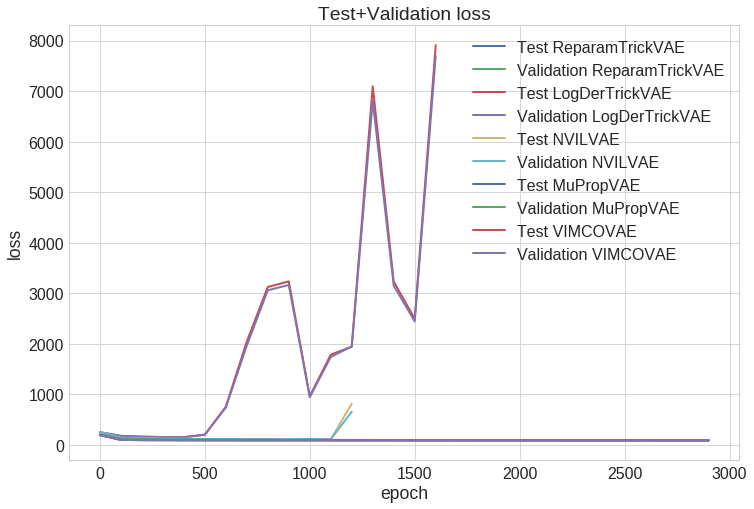

 97%|█████████▋| 2901/3001 [17:53:07<55:29, 33.29s/it]

In [ ]:
train_model(**setup_input_vaes_and_params(**params))

In [21]:
from datetime import datetime,date,timedelta

In [27]:
a=[datetime.now(), datetime.now() + timedelta(days=1), datetime.now() - timedelta(days=1), 
   datetime.now() - timedelta(minutes=1)]
print(a)
print(sorted(map(lambda x: x.strftime("%Y-%m-%d_%H:%M:%S"), a)))

[datetime.datetime(2017, 10, 22, 20, 31, 4, 276399), datetime.datetime(2017, 10, 23, 20, 31, 4, 276408), datetime.datetime(2017, 10, 21, 20, 31, 4, 276415), datetime.datetime(2017, 10, 22, 20, 30, 4, 276419)]
['2017-10-21_20:31:04', '2017-10-22_20:30:04', '2017-10-22_20:31:04', '2017-10-23_20:31:04']


In [38]:
from tensorflow.python.tools.inspect_checkpoint import print_tensors_in_checkpoint_file
checkpoint_path = os.path.join('weights/GumbelSoftmaxTrickVAE/BinaryMNIST/8n_ary-m50-nz50/2017-10-22_20:48:25/', 
                               "1")

# List ALL tensors example output: v0/Adam (DT_FLOAT) [3,3,1,80]
print_tensors_in_checkpoint_file(file_name=checkpoint_path, tensor_name='', all_tensors=True)

tensor_name:  decoder_h1
[[ 0.01145186  0.03341182 -0.0347914  ...,  0.00760252 -0.08768659
  -0.00900549]
 [-0.0709314   0.00179533  0.04616047 ..., -0.01076593 -0.0384513
  -0.02274358]
 [-0.07150261  0.09169038  0.04706533 ...,  0.0212275   0.04129497
  -0.07378174]
 ..., 
 [-0.09408414  0.06377313  0.08562177 ...,  0.09008905 -0.0126012
   0.00368432]
 [-0.07439517  0.02810889 -0.01391017 ...,  0.06647761  0.08908774
   0.03630285]
 [-0.07376121 -0.04547949  0.03171489 ...,  0.11520282  0.06158362
   0.0382445 ]]
tensor_name:  decoder_h1_b
[ -6.15973305e-03   1.30147710e-02   1.91080682e-02  -9.92362946e-03
   1.68863665e-02   1.42155029e-02   1.00400262e-02   1.73367076e-02
   1.41380500e-04  -9.95298289e-03   1.51596414e-02   1.70328449e-02
   1.12553011e-03   3.26092844e-03   8.96532182e-03  -4.77411272e-03
  -4.73627355e-03  -1.29733153e-03   1.70184188e-02   1.66022368e-02
   1.06859766e-02  -1.17893042e-02   1.75170414e-02  -8.65983590e-03
  -6.23660581e-03   1.80506259e-02  

In [42]:
from tensorflow.python.tools.inspect_checkpoint import print_tensors_in_checkpoint_file
checkpoint_path = os.path.join('weights/GumbelSoftmaxTrickVAE/BinaryMNIST/8n_ary-m50-nz50/2017-10-22_20:59:55/', 
                               "1")

# List ALL tensors example output: v0/Adam (DT_FLOAT) [3,3,1,80]
print_tensors_in_checkpoint_file(file_name=checkpoint_path, tensor_name='', all_tensors=True)

tensor_name:  decoder_h1
[[ 0.0222223  -0.02237491  0.04535355 ...,  0.02512828 -0.03832965
  -0.01370481]
 [ 0.08738908 -0.07766914  0.09734915 ...,  0.05308324  0.02665559
   0.0159409 ]
 [-0.07929005 -0.00054886 -0.0685075  ..., -0.05216817 -0.00288273
   0.07900927]
 ..., 
 [-0.07129651 -0.05738412 -0.02645214 ..., -0.02249821 -0.09005299
  -0.09602822]
 [ 0.06834735 -0.03307848 -0.02752051 ..., -0.00284593  0.04965913
   0.03129818]
 [-0.06118779 -0.08464027  0.08244366 ...,  0.01557825 -0.08110772
   0.08979939]]
tensor_name:  decoder_h1_b
[  1.44707551e-02   1.22725405e-02  -1.25782699e-05   1.70165598e-02
   5.28433546e-03   8.76763836e-04   1.20629894e-03   1.72745958e-02
   1.68839358e-02   1.79790761e-02   1.70022342e-02   1.26636261e-02
  -7.86981825e-03   1.86078381e-02   1.93998106e-02   1.45900277e-02
   1.68786440e-02   1.40986657e-02  -8.98599252e-03   1.26098571e-02
   1.79773811e-02   4.99974331e-03   1.49735603e-02   1.29580656e-02
   1.31978067e-02   1.72641836e-02

VIMCOVAE: validation cost = 103.487945557, test cost = 93.540657043


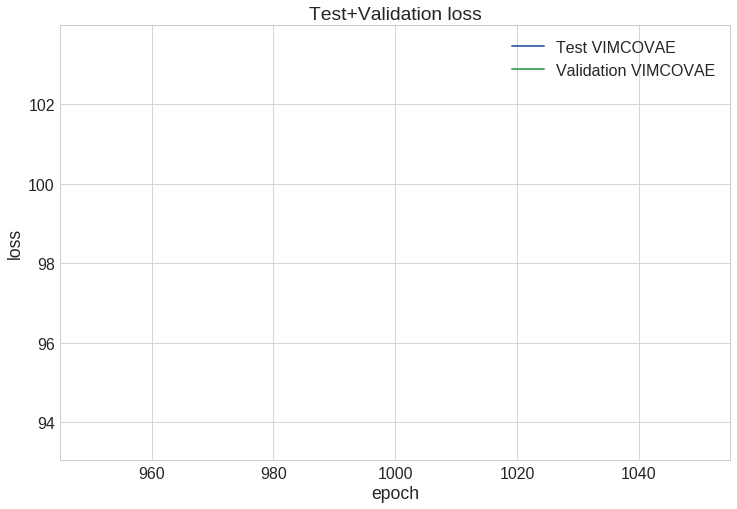

100%|██████████| 1/1 [11:15<00:00, 675.52s/it]


In [9]:
test_model(**setup_input_vaes_and_params(**params))

In [6]:
params = {
    'X_train': X_train,
    'X_test': X_test,
    'binarized': True,
    'n_z': 200,
    'n_ary': 2,
    'train_obj_samples': 1,
    'test_batch_size': 512,
    'test_obj_samples': 5,        
    'cuda_devices': '1',
    'save_step': 100,
    'save_weights': True,
    'mem_fraction': 0.2,
    'all_vaes': False
}

GumbelSoftmaxTrickVAE: train cost = 98.435791016, test cost = 102.173988342


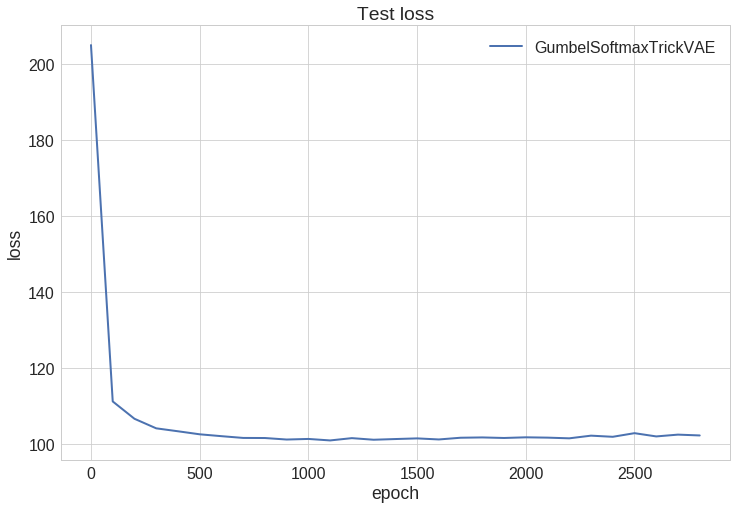

 93%|█████████▎| 2805/3001 [3:37:32<13:35,  4.16s/it]

In [ ]:
train_model(**setup_input_vaes_and_params(**params))

In [7]:
config_params = {
    'n_epochs': 501,
    'display_step': 100,
    'save_weights': True,
    'save_step': 100,
    'save_path': 'VAE-G-m{}/'.format(train_params['obj_samples']),
    'cuda_devices': '0,1',
    'n_iterations': 10
}

5it [00:22,  4.61s/it]
5it [00:19,  3.86s/it]


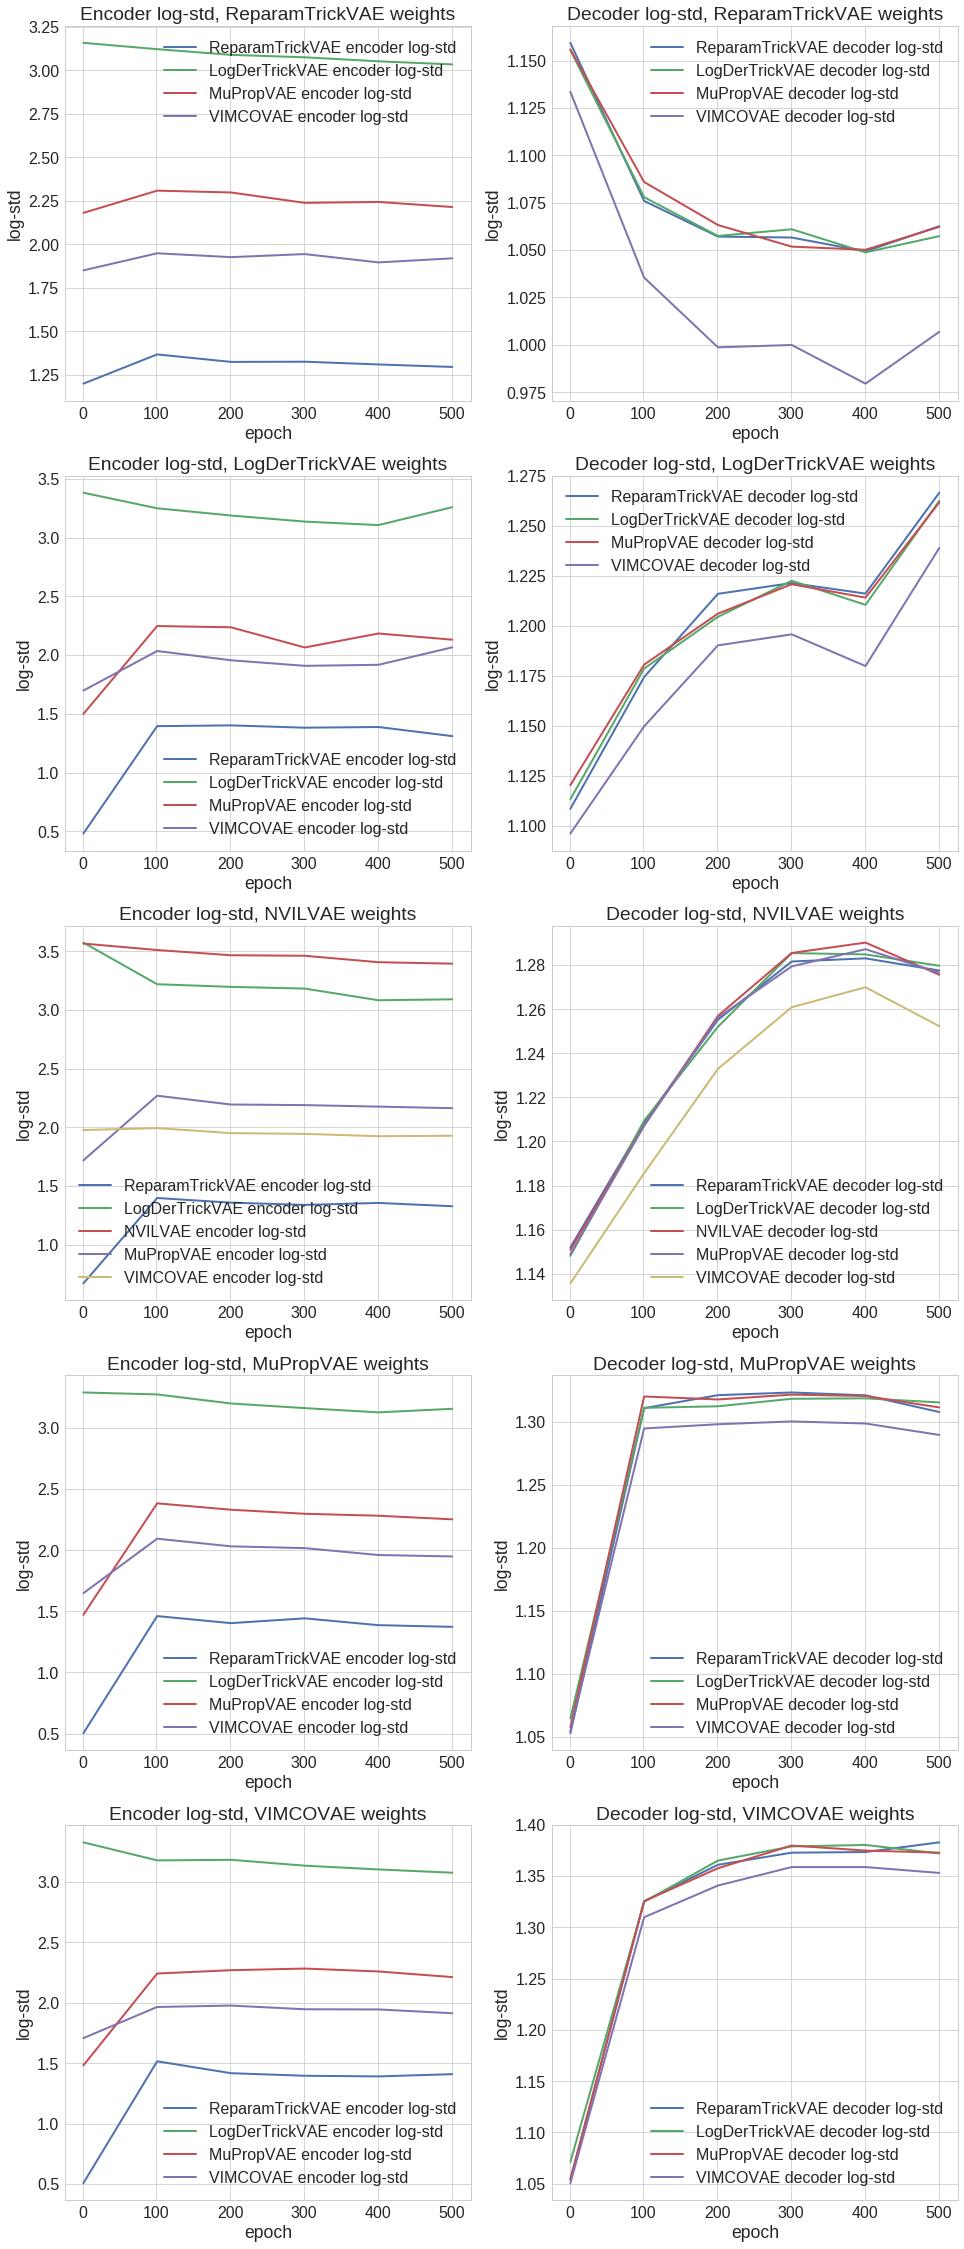

In [8]:
consider_stds(vaes, vae_params, train_params['data'], config_params['n_epochs'], train_params['batch_size'], 
              config_params['n_iterations'], config_params['save_step'], config_params['save_path'], 
              config_params['cuda_devices'])

ReparamTrickVAE: train cost = 105.051834106, test cost = 104.001396179


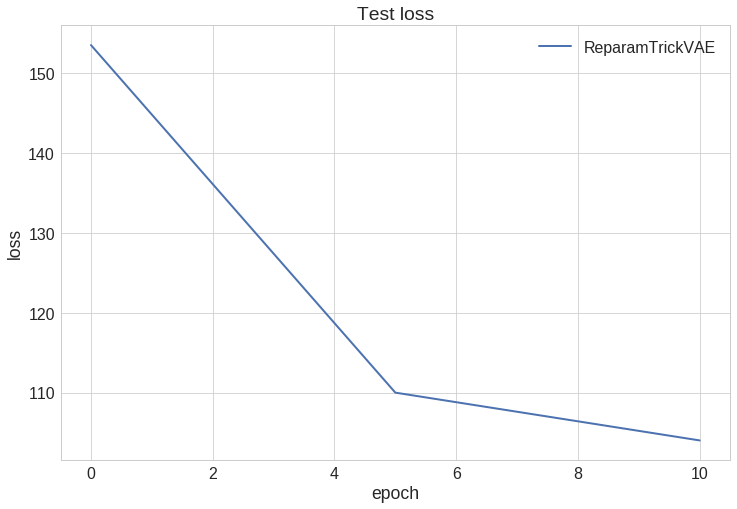

100%|██████████| 11/11 [00:24<00:00,  2.21s/it]


In [6]:
train(vaes, names, 
      X_train, X_test, 
      train_batch_size, test_batch_size,
      train_obj_samples, test_obj_samples,
      training_epochs, 
      display_step, weights_save_step, 
      save_weights, save_path, 
      cuda_devices)

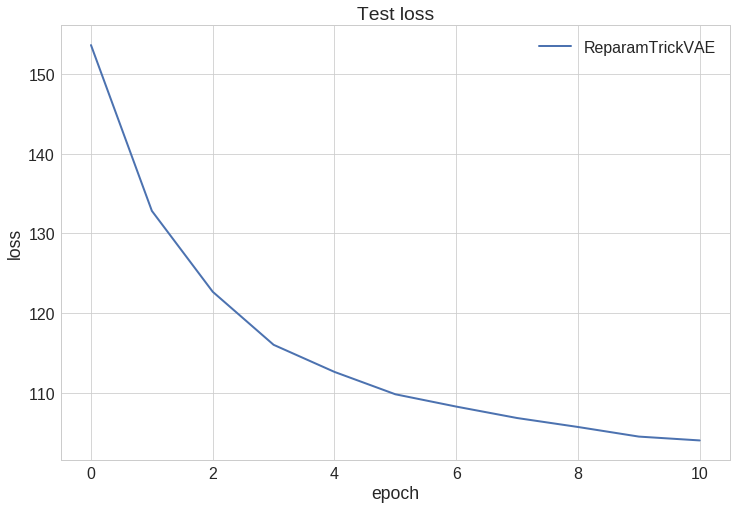

100%|██████████| 11/11 [00:09<00:00,  1.15it/s]


In [9]:
test(vaes, names, X_test, test_batch_size, test_obj_samples,
          training_epochs, display_step, weights_save_step, 
          save_path, cuda_devices)

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from tensorflow.examples.tutorials.mnist import input_data 
from collections import defaultdict
from tqdm import tqdm
import sys
sys.path.append('../python/')
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

%load_ext autoreload

tf.logging.set_verbosity(tf.logging.ERROR)
tf.logging.set_verbosity(tf.logging.WARN)
tf.logging.set_verbosity(tf.logging.DEBUG)
tf.logging.set_verbosity(tf.logging.FATAL)
import warnings
warnings.filterwarnings("ignore", module="matplotlib")

np.random.seed(1234)
tf.set_random_seed(1234)

In [4]:
%%capture
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
X_train, X_test = mnist.train, mnist.test

In [3]:
%autoreload
from vae import VAE, LogDerTrickVAE, VIMCOVAE, NVILVAE, MuPropVAE, GumbelSoftmaxTrickVAE
from utils import train, get_gradient_mean_and_std

In [6]:
n_ary = 1
n_samples = 20
encoder_distribution = 'gaussian'

save_weights = True
save_path = 'VAE-G-m{}/'.format(n_samples)

In [7]:
n_examples = mnist.train.num_examples
n_input = 784
n_z = 50
n_hidden = 200

network_architecture = {
    'encoder': {
        'h1': (n_input, n_hidden), 
        'h2': (n_hidden, n_ary*n_hidden), 
        'out_mean': (n_ary*n_hidden, n_ary*n_z)
    }, 
    'decoder': {
        'h1': (n_ary*n_z, n_hidden), 
        'h2': (n_hidden, n_hidden),
        'out_mean': (n_hidden, n_input)
    }
}
if encoder_distribution == 'gaussian':
    network_architecture['encoder']['out_log_sigma_sq'] = (n_ary*n_hidden, n_ary*n_z)

In [8]:
training_epochs = 3001
display_step = 50
weights_save_step = 100
batch_size = 128

### The comparison of all methods

In [9]:
if encoder_distribution == 'gaussian':
    vaes = [VAE, LogDerTrickVAE, NVILVAE, MuPropVAE]
elif encoder_distribution == 'multinomial':
    vaes = [LogDerTrickVAE, NVILVAE, MuPropVAE, GumbelSoftmaxTrickVAE]

if n_samples > 1:
    vaes.append(VIMCOVAE)
learning_rates = [1e-4] * len(vaes)
if encoder_distribution == 'gaussian':
    learning_rates[0] = 1e-3

In [10]:
vaes = [vae(n_input, n_z, network_architecture, learning_rate, encoder_distribution=encoder_distribution, 
            n_samples=n_samples, n_ary=n_ary) 
        for vae, learning_rate in zip(vaes, learning_rates)]
names = [str(vae) for vae in vaes]

ReparamTrickVAE: train cost = 83.527465820, test cost = 90.433982849
LogDerTrickVAE: train cost = 7591.138671875, test cost = 7720.711425781
NVILVAE: train cost = 98.406455994, test cost = 109.992614746
MuPropVAE: train cost = 89.550888062, test cost = 97.476593018
VIMCOVAE: train cost = 85.283103943, test cost = 91.913375854


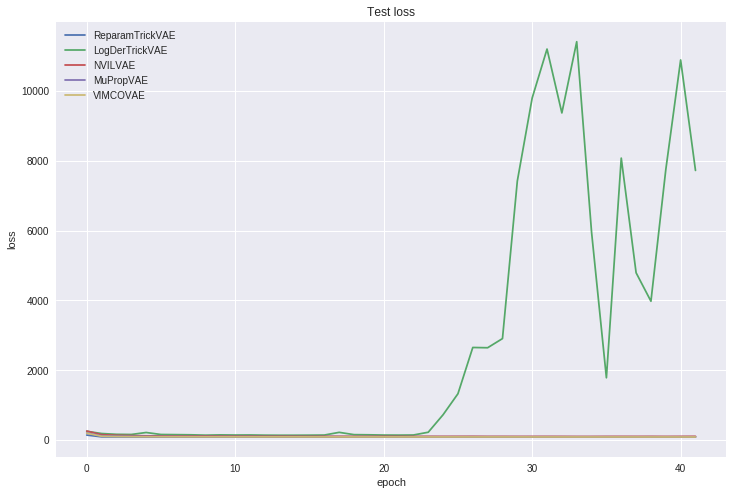

 69%|██████▉   | 2067/3001 [17:51:31<8:00:18, 30.86s/it]

In [ ]:
train(vaes, names, X_train, X_test, n_examples, batch_size, training_epochs, 
      display_step, weights_save_step, save_weights, save_path)

### The comparison of the gradient estimator variance of each method

In [ ]:
vaes = [LogDerTrickVAE, NVILVAE, VIMCOVAE, MuPropVAE, GumbelSoftmaxTrickVAE]
learning_rates = [1e-4] * len(vaes)
vaes = [vae(n_input, n_z, network_architecture, learning_rate, n_ary=n_ary) 
        for vae, learning_rate in zip(vaes, learning_rates)]
names = [str(vae) for vae in vaes]

In [ ]:
batch_xs, _ = X_train.next_batch(batch_size)
n_iterations = 100

In [ ]:
encoder_stds = defaultdict(lambda: defaultdict(list))
decoder_stds = defaultdict(lambda: defaultdict(list))

for weights_name in tqdm(names):
    for name, vae in zip(names, vaes):
        if name == 'NVILVAE' and weights_name != 'NVILVAE':
            continue
        for saved_index in range(1, training_epochs+1, weights_save_step):
            vae.restore_weights(save_path + weights_name + '_{}'.format(saved_index))
            _, encoder_std = get_gradient_mean_and_std(vae, batch_xs, n_iterations, 'encoder')
            _, decoder_std = get_gradient_mean_and_std(vae, batch_xs, n_iterations, 'decoder')
            encoder_stds[weights_name][name].append(encoder_std)
            decoder_stds[weights_name][name].append(decoder_std)
for vae in vaes:
        vae.close()
tf.reset_default_graph()

100%|██████████| 5/5 [15:03<00:00, 176.92s/it]


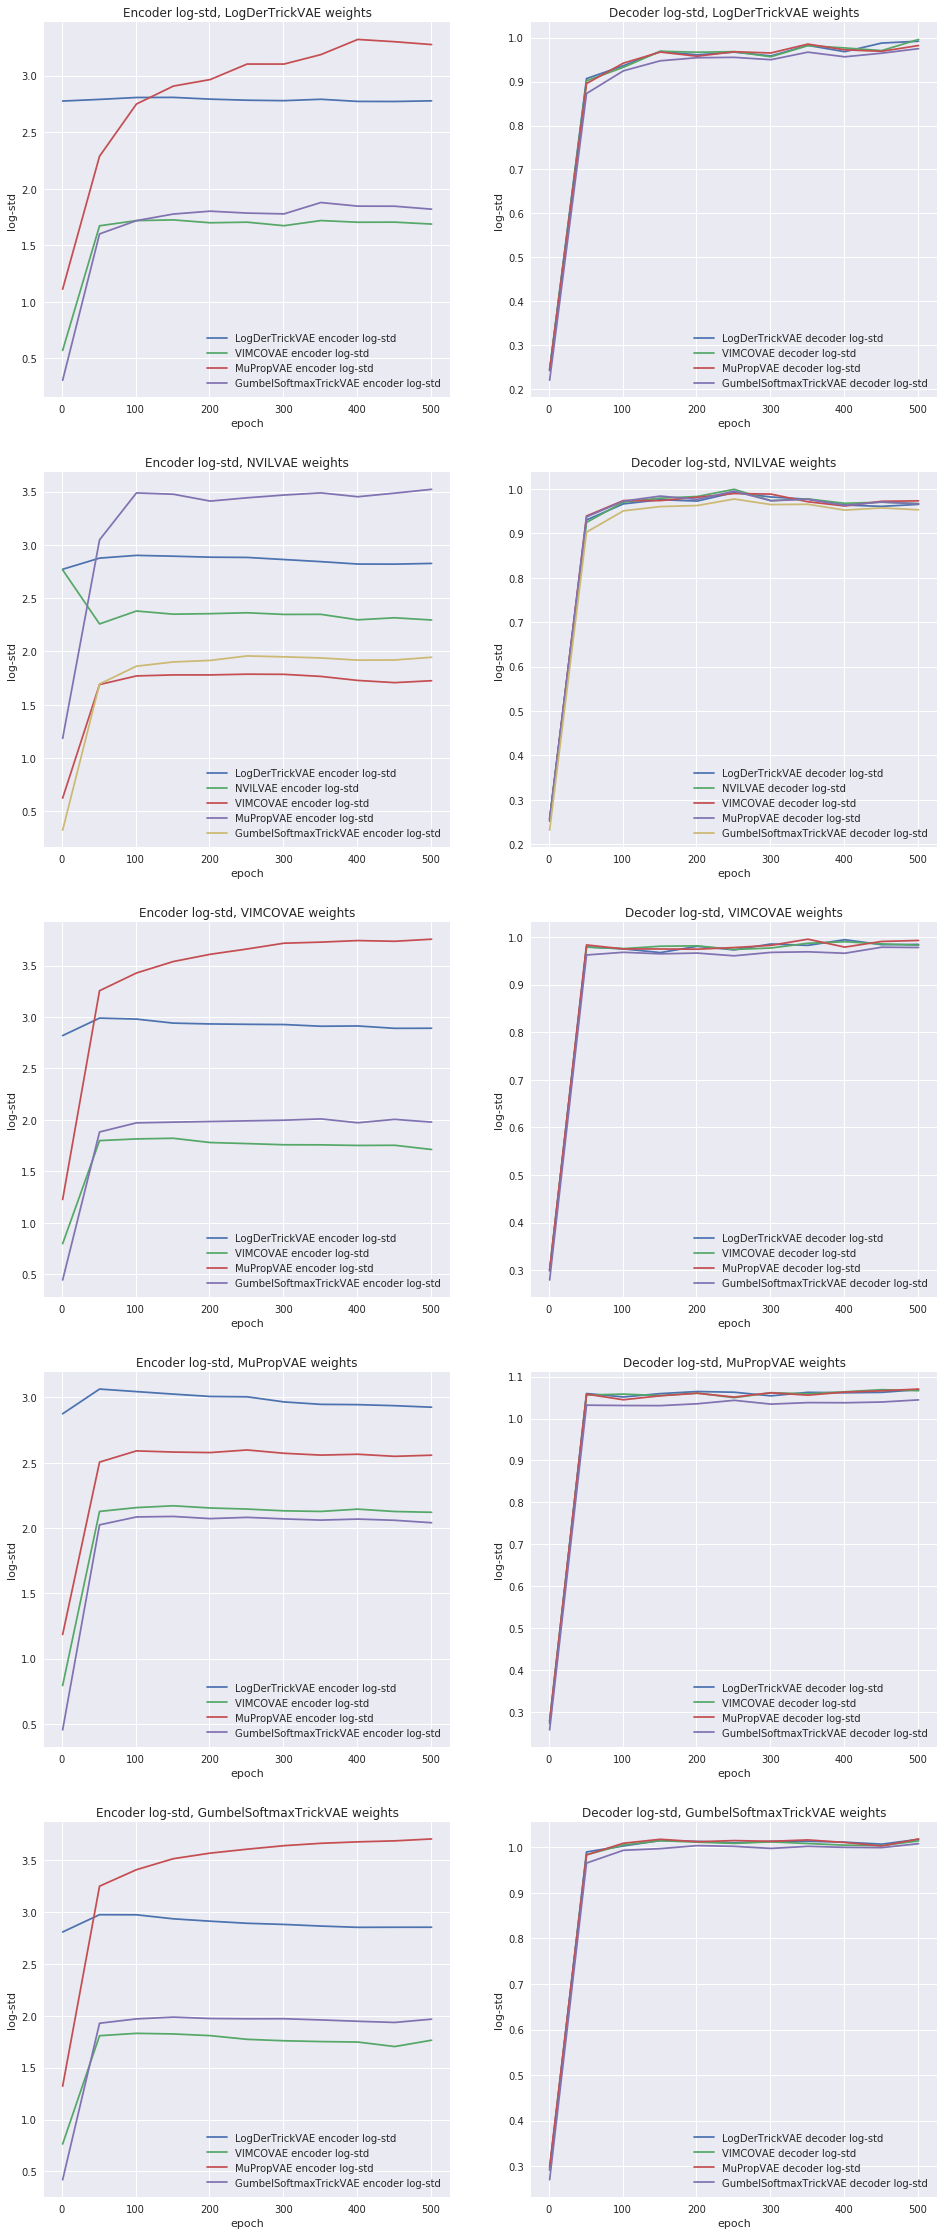

In [ ]:
n_vaes = len(vaes)
weights_range = np.arange(1, training_epochs+1, weights_save_step)

fig, axes = plt.subplots(n_vaes, 2, figsize=(16, 40))
for idx, weights_name in enumerate(names):
    for name in names:
        if name == 'NVILVAE' and weights_name != 'NVILVAE':
            continue
        axes[idx][0].plot(weights_range, np.log10(encoder_stds[weights_name][name]), 
                          label='{} encoder log-std'.format(name))
        axes[idx][1].plot(weights_range, np.log10(decoder_stds[weights_name][name]), 
                          label='{} decoder log-std'.format(name))
    axes[idx][0].set_title('Encoder log-std, {} weights'.format(weights_name))
    axes[idx][0].set_xlabel('epoch')
    axes[idx][0].set_ylabel('log-std')
    axes[idx][0].legend(loc='best')
    
    axes[idx][1].set_title('Decoder log-std, {} weights'.format(weights_name))
    axes[idx][1].set_xlabel('epoch')
    axes[idx][1].set_ylabel('log-std')
    axes[idx][1].legend(loc='best')
plt.show()